In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons

In [26]:
X,y=make_moons(noise=0.1,random_state=42)

In [28]:
data=pd.DataFrame(X,columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0


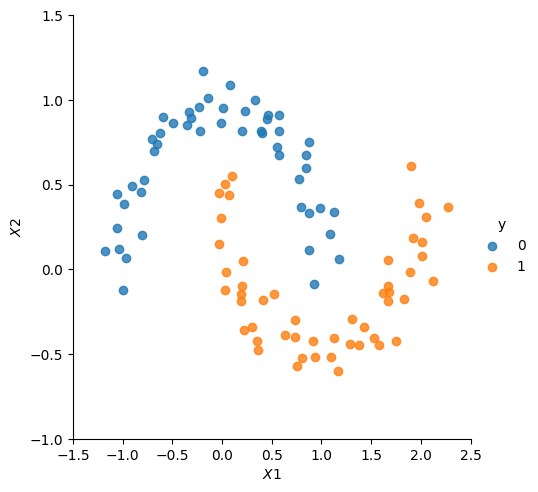

In [29]:
sns.lmplot(x="x1",y="x2",hue='y',data=data,fit_reg=False,legend=True)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('$X1$',fontsize=10)
plt.ylabel('$X2$',fontsize=10)
plt.show()

In [63]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
svm=SVC(kernel='rbf',gamma=3,C=5)
svm.fit(X_scaled,y)

x_min,x_max=X.min()-1,X.max()+1
y_min,y_max=y.min()-1,y.max()+1

xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                  np.arange(y_min,y_max,0.1))
xy=np.c_[xx.ravel(),yy.ravel()]
xy_scaled=scaler.transform(xy)

Z=svm.predict(xy_scaled)
Z=Z.reshape(xx.shape)


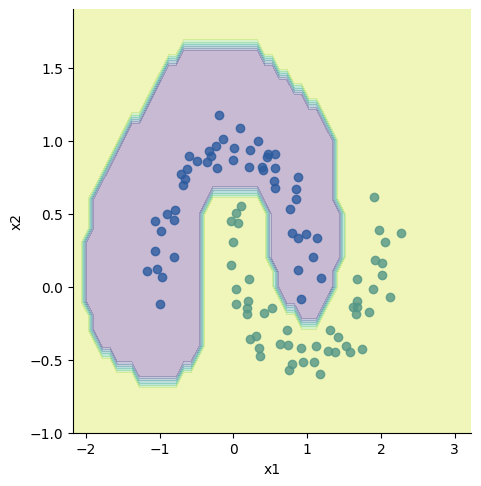

In [64]:
sns.lmplot(x='x1',y='x2',data=data,fit_reg=False,legend=True)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()

In [44]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
param_grid={
    'C':[0.1,1,10],
    'kernel':['rbf'],
    'gamma':[0.1,1,'scale']
}
svm=SVC()
gs=GridSearchCV(svm,param_grid=param_grid,cv=10)
gs.fit(X,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale'],
                         'kernel': ['rbf']})

In [37]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [38]:
gs.best_score_

1.0

In [55]:
params={
    'C':uniform(loc=5,scale=10).rvs(size=1000),
    'gamma':uniform(loc=0,scale=3).rvs(size=100)
}
svm=SVC(kernel='rbf')
rs=RandomizedSearchCV(svm,param_distributions=params)
rs.fit(X,y)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': array([10.32960792, 13.14109764,  9.33668245,  5.48795391,  9.19194314,
       13.54794818, 12.65910208, 14.52091857,  6.23514503, 14.16048148,
        8.31161305,  6.06341863, 13.91512123,  6.20061206, 13.94084349,
        9.7755373 ,  6.08160386,  6.74870789,  5.7203401 , 12.61180799,
       12.51149093, 10.25892323, 10.69359949,  9.14186466,  6.2671943...
       2.42106461, 0.02195796, 2.70090877, 2.28892816, 1.80395456,
       2.80409964, 1.86067414, 1.70183582, 0.14218389, 0.30654524,
       1.98948619, 2.32465907, 1.38151739, 1.58275197, 2.77402385,
       2.04815623, 1.73020794, 1.65312075, 0.11572874, 2.81355332,
       2.17527566, 1.87988077, 1.56112194, 1.53522675, 0.63330167,
       0.4840519 , 2.38519497, 2.49834741, 2.75854922, 2.15056538,
       0.23197744, 0.02354789, 0.75975549, 0.8396796 , 1.16590701])})

In [56]:
rs.best_params_

{'gamma': 2.807222466726303, 'C': 14.75426747711672}

In [67]:
svm=SVC(**rs.best_params_)

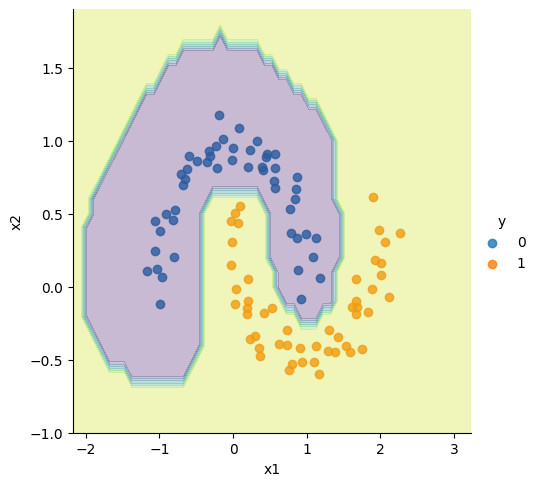

In [68]:
svm.fit(X_scaled,y)

Z=svm.predict(xy_scaled)
Z=Z.reshape(xx.shape)

sns.lmplot(x='x1',y='x2',hue='y',data=data,fit_reg=False)
plt.contourf(xx,yy,Z,alpha=0.3)
plt.show()